In [310]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [311]:
df = pd.read_csv('E:\Mail Classifier and recommender\spam.csv', encoding='latin-1')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\heyia\AppData\Local\Temp\ipykernel_43232\3875421181.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('E:\Mail Classifier and recommender\spam.csv', encoding='latin-1')


In [312]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [313]:
df = df.drop(columns = ['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], axis =1)

In [314]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [315]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [316]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [317]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [318]:
df['target'] = encoder.fit_transform(df['target'])


In [319]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [320]:
df = df.drop_duplicates()

<Axes: xlabel='target', ylabel='count'>

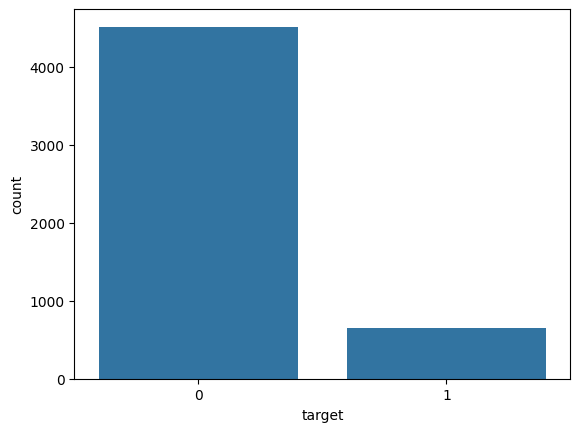

In [321]:
sns.countplot(x = df['target'])

In [322]:
import nltk #natural language toolkit


In [323]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heyia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [324]:
df['num_char'] = df['text'].apply(lambda x: len(x))
df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\heyia\AppData\Local\Temp\ipykernel_43232\2352216951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df['text'].apply(lambda x: len(x))
C:\Users\heyia\AppData\Local\Temp\ipykernel_43232\2352216951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\heyia\AppData\Local\Temp\ipykernel_43232\2352216951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [325]:
df

,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


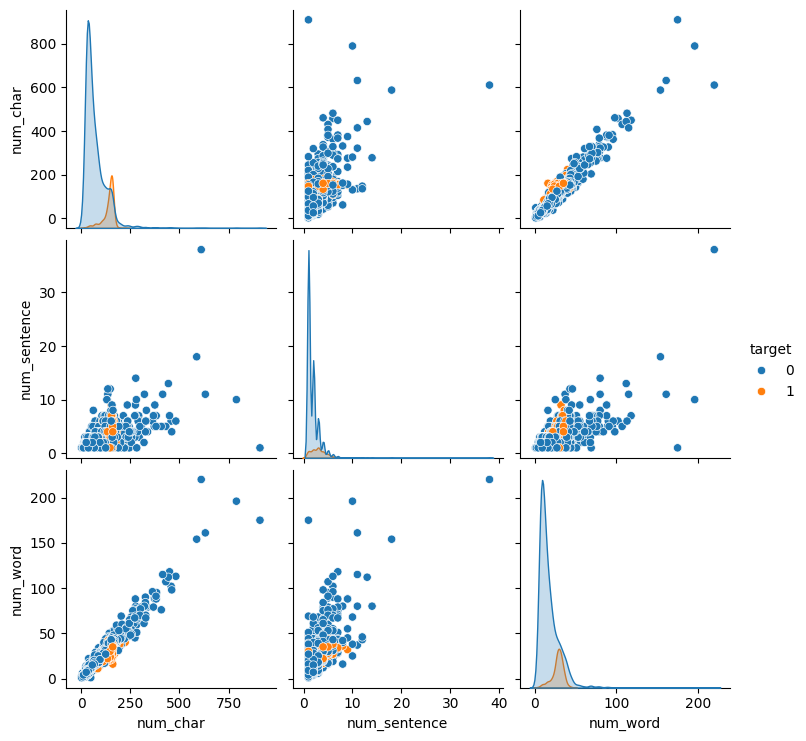

In [326]:
sns.pairplot(df[['num_char', 'num_sentence', 'num_word' , 'target']], hue = 'target')

In [327]:
df[['num_char', 'num_sentence', 'num_word' , 'target']].corr()

,num_char,num_sentence,num_word,target
num_char,1.000000,0.624139,0.965760,0.384717
num_sentence,0.624139,1.000000,0.679971,0.263939
num_word,0.965760,0.679971,1.000000,0.262912
target,0.384717,0.263939,0.262912,1.000000


<Axes: >

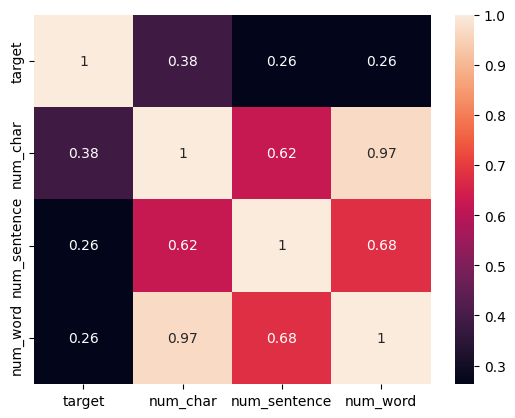

In [328]:
#heatmap
sns.heatmap(df[[ 'target', 'num_char', 'num_sentence', 'num_word']].corr(), annot=True)

<font size = 5>Comparetively num_char has the best corr with target (0.38), we should use only num_char in our training model (as there is so much inter correlation within independent variable) </font>

In [329]:
from wordcloud import WordCloud
wc = WordCloud()

In [330]:
wc.generate(df[df['target']==1]['text'].str.cat(sep=' '))

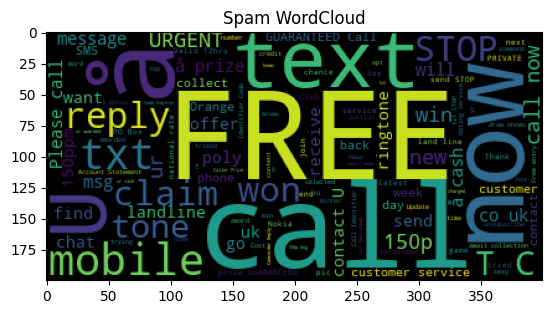

In [331]:
plt.title("Spam WordCloud")
plt.imshow(wc)

In [332]:
wc.generate(df[df['target']==0]['text'].str.cat(sep=' '))

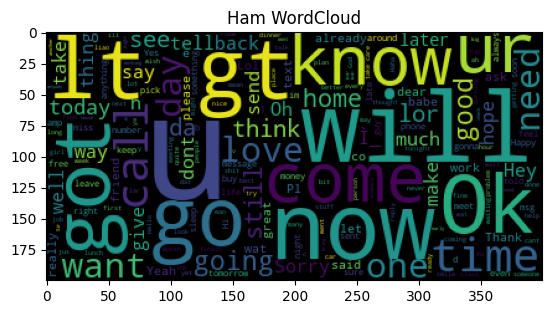

In [333]:
plt.title('Ham WordCloud')
plt.imshow(wc)

In [334]:
spam_text_list = df[df['target']==1]['text'].tolist()

In [335]:
spam_corpus=[]
for msg in spam_text_list:
    splitted = msg.split()
    for word in splitted:
        spam_corpus.append(word)


In [336]:
spam_corpus

['Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)T&C's",
 'apply',
 "08452810075over18's",
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 "it's",
 'been',
 '3',
 "week's",
 'now',
 'and',
 'no',
 'word',
 'back!',
 "I'd",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still?',
 'Tb',
 'ok!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send,',
 'å£1.50',
 'to',
 'rcv',
 'WINNER!!',
 'As',
 'a',
 'valued',
 'network',
 'customer',
 'you',
 'have',
 'been',
 'selected',
 'to',
 'receivea',
 'å£900',
 'prize',
 'reward!',
 'To',
 'claim',
 'call',
 '09061701461.',
 'Claim',
 'code',
 'KL341.',
 'Valid',
 '12',
 'hours',
 'only.',
 'Had',
 'your',
 'mobile',
 '11',
 'months',
 'or',
 'more?',
 'U',
 'R',
 'entitled',
 'to',
 'Update',
 'to',
 'the',
 'latest',
 'colour',
 'mobiles',
 'with',
 'camera',
 'for',
 'Free!',

In [337]:
from collections import Counter

In [338]:
Counter(spam_corpus)

Counter({'to': 522,
         'a': 314,
         'your': 171,
         'call': 163,
         'the': 160,
         'or': 155,
         'for': 152,
         '2': 151,
         'you': 150,
         'is': 130,
         'Call': 116,
         'on': 112,
         'have': 110,
         'from': 109,
         'and': 102,
         '&': 89,
         'with': 86,
         'ur': 86,
         'of': 79,
         'FREE': 75,
         '4': 75,
         'mobile': 71,
         'our': 68,
         'You': 67,
         'are': 67,
         'To': 65,
         'Your': 65,
         'claim': 63,
         'text': 61,
         'U': 58,
         'now': 56,
         'Txt': 55,
         'in': 54,
         'txt': 54,
         'reply': 54,
         'free': 53,
         'contact': 51,
         '-': 49,
         'just': 42,
         'this': 42,
         'send': 41,
         'be': 41,
         'prize': 40,
         'new': 39,
         'get': 39,
         'per': 39,
         'STOP': 39,
         'been': 38,
         'Reply': 

In [339]:
spam_count = Counter(spam_corpus)

In [340]:
pd.DataFrame(spam_count.items(), columns = ['words', 'count'])

,words,count
0,Free,29
1,entry,20
2,in,54
3,2,151
4,a,314
...,...,...
4307,"name,",1
4308,house,1
4309,å£750,1
4310,087187272008,1


In [341]:
df_spam = pd.DataFrame(spam_count.most_common(30),columns = ['words', 'count'])
#can also use
#pd.DataFrame(data = spam_count.items(),columns = ['words', 'count'])[:30]
#

In [342]:
df_spam.head(5)

,words,count
0,to,522
1,a,314
2,your,171
3,call,163
4,the,160


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'to'),
  Text(1, 0, 'a'),
  Text(2, 0, 'your'),
  Text(3, 0, 'call'),
  Text(4, 0, 'the'),
  Text(5, 0, 'or'),
  Text(6, 0, 'for'),
  Text(7, 0, '2'),
  Text(8, 0, 'you'),
  Text(9, 0, 'is'),
  Text(10, 0, 'Call'),
  Text(11, 0, 'on'),
  Text(12, 0, 'have'),
  Text(13, 0, 'from'),
  Text(14, 0, 'and'),
  Text(15, 0, '&'),
  Text(16, 0, 'with'),
  Text(17, 0, 'ur'),
  Text(18, 0, 'of'),
  Text(19, 0, 'FREE'),
  Text(20, 0, '4'),
  Text(21, 0, 'mobile'),
  Text(22, 0, 'our'),
  Text(23, 0, 'You'),
  Text(24, 0, 'are'),
  Text(25, 0, 'To'),
  Text(26, 0, 'Your'),
  Text(27, 0, 'claim'),
  Text(28, 0, 'text'),
  Text(29, 0, 'U')])

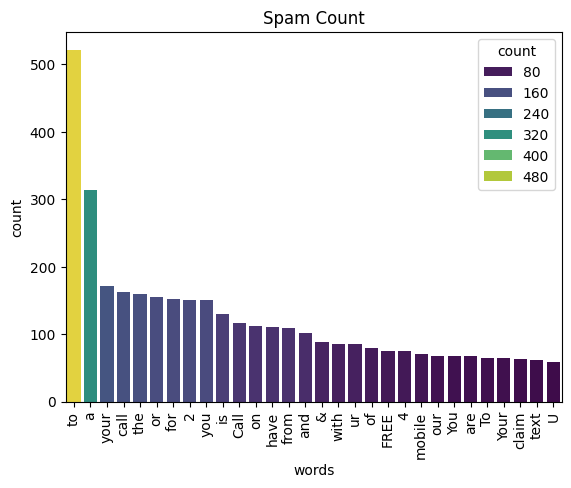

In [357]:
sns.barplot(data = df_spam, x ='words', y = 'count', palette='viridis', hue='count')
plt.title("Spam Count")
plt.xticks(rotation = 'vertical')

In [344]:
ham_text_list = df[df['target']== 0]['text'].tolist()

In [345]:
ham_list=[]
for msg in ham_text_list:
    for words in msg.split():
        ham_list.append(words)


In [346]:
ham_list

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...',
 'Ok',
 'lar...',
 'Joking',
 'wif',
 'u',
 'oni...',
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor...',
 'U',
 'c',
 'already',
 'then',
 'say...',
 'Nah',
 'I',
 "don't",
 'think',
 'he',
 'goes',
 'to',
 'usf,',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'Even',
 'my',
 'brother',
 'is',
 'not',
 'like',
 'to',
 'speak',
 'with',
 'me.',
 'They',
 'treat',
 'me',
 'like',
 'aids',
 'patent.',
 'As',
 'per',
 'your',
 'request',
 "'Melle",
 'Melle',
 '(Oru',
 'Minnaminunginte',
 'Nurungu',
 "Vettam)'",
 'has',
 'been',
 'set',
 'as',
 'your',
 'callertune',
 'for',
 'all',
 'Callers.',
 'Press',
 '*9',
 'to',
 'copy',
 'your',
 'friends',
 'Callertune',
 "I'm",
 'gonna',
 'be',
 'home',
 'soon',
 'and',
 'i',
 "don't",
 'want',
 'to',
 'talk',
 'about',
 'this',
 'stuff',
 'anymore',
 'toni

In [347]:
df_ham = pd.DataFrame(Counter(ham_list).most_common(30), columns = ['words', 'count'])[:30][:]
df_ham.head(5)

,words,count
0,to,1450
1,you,1412
2,I,1349
3,the,954
4,a,884


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'to'),
  Text(1, 0, 'you'),
  Text(2, 0, 'I'),
  Text(3, 0, 'the'),
  Text(4, 0, 'a'),
  Text(5, 0, 'i'),
  Text(6, 0, 'and'),
  Text(7, 0, 'in'),
  Text(8, 0, 'u'),
  Text(9, 0, 'my'),
  Text(10, 0, 'is'),
  Text(11, 0, 'me'),
  Text(12, 0, 'for'),
  Text(13, 0, 'of'),
  Text(14, 0, 'that'),
  Text(15, 0, 'it'),
  Text(16, 0, 'your'),
  Text(17, 0, 'have'),
  Text(18, 0, 'on'),
  Text(19, 0, 'at'),
  Text(20, 0, 'be'),
  Text(21, 0, 'are'),
  Text(22, 0, 'not'),
  Text(23, 0, 'get'),
  Text(24, 0, '2'),
  Text(25, 0, 'can'),
  Text(26, 0, "I'm"),
  Text(27, 0, 'so'),
  Text(28, 0, 'but'),
  Text(29, 0, 'will')])

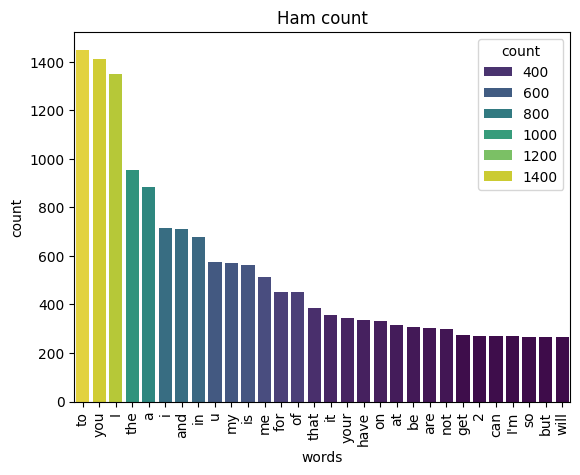

In [352]:
sns.barplot(data = df_ham, x = 'words', y = 'count', palette='viridis', hue='count')
plt.title("Ham count")
plt.xticks(rotation = 'vertical')

In [ ]:
#eda done